# Decision Tree for graduate_Admission


Here, we make a decision tree if, the graduate student is likelt to get admission or not.

dataset link : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# change all the spaces in the column to underscores for better accesibility later:

df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# our y parameter will be chance of admits which we can change to numerical value with threshold of 0.8
df['chance_of_admit'] = df['chance_of_admit'].apply(lambda x : 1 if x>0.8 else 0)

In [6]:
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


In [7]:
# for the predictors we dont want the serial.no column.
x = df.loc[:,'gre_score':'research']

y = df['chance_of_admit']

In [8]:
x

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [9]:
x_train , x_test, y_train , y_test =  train_test_split(x,y,test_size = 0.2 , random_state = 4)

In [10]:
depth_list = list(range(2, 10))
acc_list = []

for dep in depth_list :
    dtree = DecisionTreeClassifier(max_depth = dep, criterion='gini', random_state = 3)
    dtree.fit(x_train,y_train)
    accuracy = dtree.score(x_test,y_test)
    acc_list.append(accuracy)

Text(0.5, 1.0, 'Accuracy of decision tree at different depths')

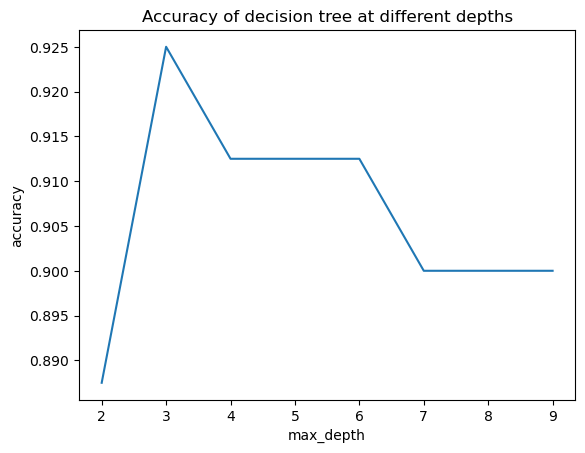

In [11]:
plt.plot(depth_list, acc_list)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy of decision tree at different depths')

In [12]:
# So we will use the depth which has maxmimim accuracy:

max_accuracy = np.max(acc_list)
best_depth = depth_list[np.argmax(acc_list)]
print(max_accuracy,best_depth)

0.925 3


In [13]:
dtree = DecisionTreeClassifier(max_depth= best_depth, criterion='gini', random_state = 2)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(dtree.score(x_test, y_test))

0.925


In [14]:
best_depth

3

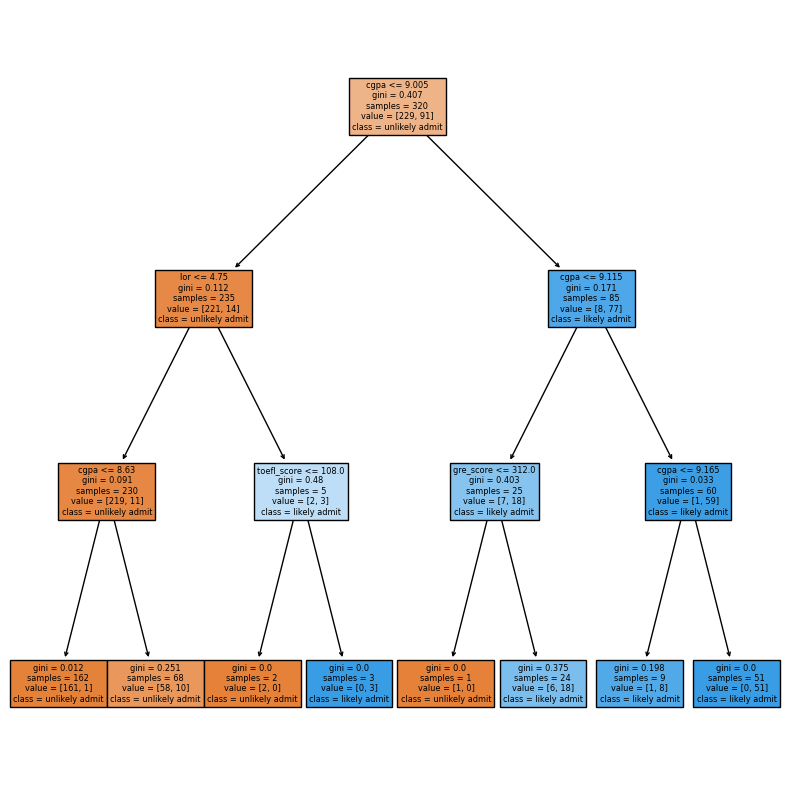

In [18]:
plt.figure(figsize=(10,10))

tree.plot_tree(dtree, feature_names = list(x_train.columns),  max_depth = 3, class_names = ['unlikely admit', 'likely admit'],
               filled=True);
